# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [5]:
# import libraries here
import pandas as pd

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [6]:
import chardet
with open('Temp_States.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [7]:
temp = pd.read_csv('Temp_States.csv',encoding='ascii')

#### Print `temp`

In [8]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [9]:
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [10]:
state_ny = temp.loc[temp['State'] == 'New York'] 

In [11]:
state_ny

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [12]:
avg_temp_ny = state_ny['Temperature'].mean()

In [13]:
avg_temp_ny

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [14]:
temp_above_15 = temp[temp['Temperature'] > 15]

In [15]:
temp_above_15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [16]:
city_above_15 = temp_above_15['City']

In [17]:
city_above_15

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [18]:
temp_above_15_under_20 = temp[(temp.Temperature > 15) & (temp.Temperature < 20)]

In [19]:
temp_above_15_under_20

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [21]:
#Mean

In [22]:
m_temp_state = temp['Temperature'].mean()

In [23]:
m_temp_state

15.158730158730156

In [24]:
#Standard deviation

In [25]:
stdev_temp_state = temp.std()['Temperature']

In [26]:
stdev_temp_state

6.695264939070773

# Challenge 2

In [27]:
#import what I'll need

In [28]:
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [29]:
import chardet
with open('Employee.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [30]:
employee = pd.read_csv('Employee.csv',encoding='ascii')

In [31]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [32]:
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

<AxesSubplot:xlabel='Years', ylabel='Count'>

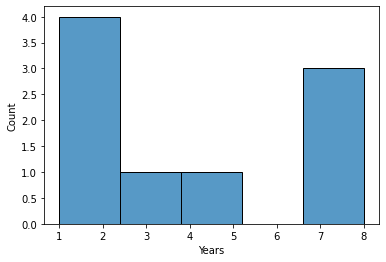

In [145]:
#Only for int dtype: therefore Years and Salary only
sns.histplot(x="Years", data=employee)

<AxesSubplot:xlabel='Salary', ylabel='Count'>

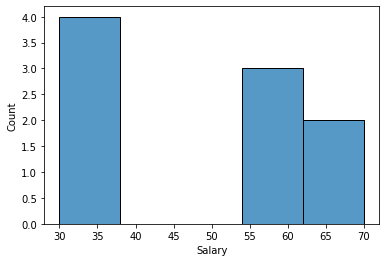

In [146]:
sns.histplot(x="Salary", data=employee)

#### What's the average salary in this company?

In [34]:
avg_salary = employee['Salary'].mean()

In [35]:
avg_salary

48.888888888888886

#### What's the highest salary?

In [36]:
hst_salary = employee['Salary'].max()

In [37]:
hst_salary

70

#### What's the lowest salary?

In [38]:
low_salary = employee['Salary'].min()

In [39]:
low_salary

30

#### Who are the employees with the lowest salary?

In [40]:
empl_low_salary = employee[employee['Salary'] == 30]

In [41]:
empl_low_salary

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [42]:
david = employee[employee['Name'] == 'David']

In [43]:
david

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [44]:
david_sal = david['Salary']

In [45]:
david_sal

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [46]:
asste_employee = employee.loc[employee['Title'] == 'associate'] 

In [47]:
asste_employee

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [48]:
# your answer here- 1 method
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [49]:
# your answer here- 2nd method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [50]:
empl_asste_abv50 = employee[(employee.Title == 'associate') & (employee.Salary > 55)]

In [51]:
empl_asste_abv50

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [52]:
employee.groupby(['Years']).mean()

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [53]:
employee.groupby(['Title']).mean()

,Years,Salary
Title,,
VP,8.00,70.000000
analyst,2.25,32.500000
associate,4.00,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

In [54]:
#A box plot shows the distribution of quantitative data, hence why I only choose Years and Salary

<AxesSubplot:>

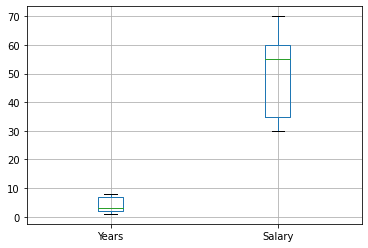

In [152]:
employee.boxplot()

In [149]:
employee.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


In [150]:
quartile.loc['25%']

Years      2.0
Salary    35.0
Name: 25%, dtype: float64

In [151]:
# print third quartile here
quartile.loc['75%']

Years      7.0
Salary    60.0
Name: 75%, dtype: float64

#### Is the mean salary per gender different?

In [59]:
empl_asste_abv50 = employee[(employee.Title == 'associate') & (employee.Salary > 55)]

s_fem = employee[employee.Gender == 'F']
#print(s_fem)
s_fem_mean = s_fem['Salary'].mean()
print('Females salary is:',s_fem_mean)

s_male = employee[employee.Gender == 'M']
#print(s_male)
s_male_mean = s_male['Salary'].mean()
print('Males salary is:',s_male_mean)

Females salary is: 47.5
Males salary is: 50.0


In [60]:
print('Males salary is', s_male_mean - s_fem_mean, 'higher than womens')

Males salary is 2.5 higher than womens


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [61]:
#In order to know the data type so we know wich ones to select, we do the following;

In [62]:
print(list(employee.columns))
employee.dtypes

['Name', 'Department', 'Education', 'Gender', 'Title', 'Years', 'Salary']


Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

In [63]:
print("\n----------- Minimum -----------\n")
print(employee[['Years', 'Salary']].min())

print("\n----------- Maximum -----------\n")
print(employee[['Years', 'Salary']].max())

print("\n----------- Mean -----------\n")
print(employee[['Years', 'Salary']].mean())


----------- Minimum -----------

Years      1
Salary    30
dtype: int64

----------- Maximum -----------

Years      8
Salary    70
dtype: int64

----------- Mean -----------

Years      4.111111
Salary    48.888889
dtype: float64


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [64]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [65]:
import chardet
with open('Orders.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [66]:
orders = pd.read_csv('Orders.csv',encoding='ascii')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [67]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [68]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [69]:
# purchase_price = amount_spent

In [70]:
purch_price_avg = orders['amount_spent'].mean()

In [71]:
purch_price_avg

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [72]:
#highest
purch_price_max = orders['amount_spent'].max()
purch_price_max 

168469.6

In [73]:
# lowest
purch_price_min = orders['amount_spent'].min()
purch_price_min

0.0

#### Select all the customers we have in Spain

In [86]:
cust_spain = orders[orders.Country == 'Spain']

In [93]:
cust_spain.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [94]:
cust_spain['Country'].value_counts()

Spain    2485
Name: Country, dtype: int64

#### Select all the customers who have bought more than 50 items ?

In [95]:
cust_more50 = orders[orders.Quantity > 50]

In [96]:
cust_more50.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00


#### Select orders from Spain that are above 50 items

In [97]:
cust_sp_abv50 = orders[(orders.Country == 'Spain') & (orders.Quantity > 50)]

In [98]:
cust_sp_abv50.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [104]:
free = orders[orders.UnitPrice == 0]

In [105]:
free.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [109]:
ord_lbag = orders[orders['Description'].str.contains("lunch bag")]

In [110]:
ord_lbag.head() 

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [111]:
ord_lbag_2011 = orders[(orders['Description'].str.contains("lunch bag")) & (orders.year == 2011)]

In [113]:
ord_lbag_2011.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65


#### Show the frequency distribution of the amount spent in Spain.

<AxesSubplot:>

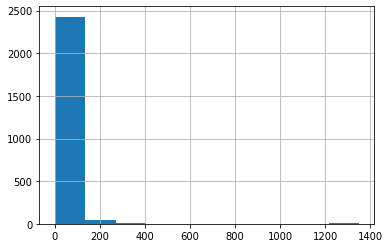

In [140]:
fq_ditb_spain=orders[orders['Country'] == 'Spain']['amount_spent']
fq_ditb_spain.hist()

#### Select all orders made in the month of August

In [115]:
ord_aug = orders[orders.month == 8]

In [117]:
ord_aug.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [141]:
ord_aug = orders[orders["month"] == 8]["Country"].value_counts()

In [142]:
ord_aug

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [132]:
avg_country = orders.groupby(["Country"])["amount_spent"].mean()

In [133]:
avg_country

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [122]:
expensive_it = orders['UnitPrice'].max()

In [123]:
expensive_it

8142.75

In [124]:
exp = orders[orders.UnitPrice == 8142.75]

In [125]:
exp

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [130]:
avg_spent_y = orders.groupby('year')['amount_spent'].mean()

In [131]:
avg_spent_y

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64